# TIME AND SERIES ANALYSIS(STOCK PRICE PREDICTION)


In [1]:
# Imprting Libraries
import numpy as np     # Efficient handling of vectors and arrays
import pandas as pd    # Data manipulation and analysis
import matplotlib.pyplot as plt    # Data visualization
import yfinance as yf    # Accessing financial data
from datetime import datetime    # Working with dates and times

In [2]:
data = yf.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [4]:
# Extracting Date from index to new coloumn 'Date'
data['Date']=data.index

In [5]:
#  Reorder columns 
data=data.iloc[:,[6,0,1,2,3,4,5]]

In [6]:
# Dimension of data0
data.shape

(3283, 7)

In [7]:
# Gettign info about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3283 entries, 2010-06-29 to 2023-07-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3283 non-null   datetime64[ns]
 1   Open       3283 non-null   float64       
 2   High       3283 non-null   float64       
 3   Low        3283 non-null   float64       
 4   Close      3283 non-null   float64       
 5   Adj Close  3283 non-null   float64       
 6   Volume     3283 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 205.2 KB


In [8]:
# Reset the index of the DataFrame
data.reset_index(inplace=True,drop=True) 

In [9]:
# list updated dataframe
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


### What we found?

- Some dates are missing in data (Inconsistent Data)

- Reason of missing dates 
    
    -`Holidays`
    
    -`Events`
    
    -`Sunday (Market Close)`

In [10]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3283 non-null   datetime64[ns]
 1   Open       3283 non-null   float64       
 2   High       3283 non-null   float64       
 3   Low        3283 non-null   float64       
 4   Close      3283 non-null   float64       
 5   Adj Close  3283 non-null   float64       
 6   Volume     3283 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 179.7 KB


In [13]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

> NOTE

- No missing Values in data 


In [14]:
# List 5 bottom values
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3278,2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400
3279,2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400
3280,2023-07-12,276.329987,276.519989,271.459991,271.989990,271.989990,95672100
3281,2023-07-13,274.589996,279.450012,270.600006,277.899994,277.899994,112681500
3282,2023-07-14,277.010010,285.299988,276.309998,281.380005,281.380005,119771100


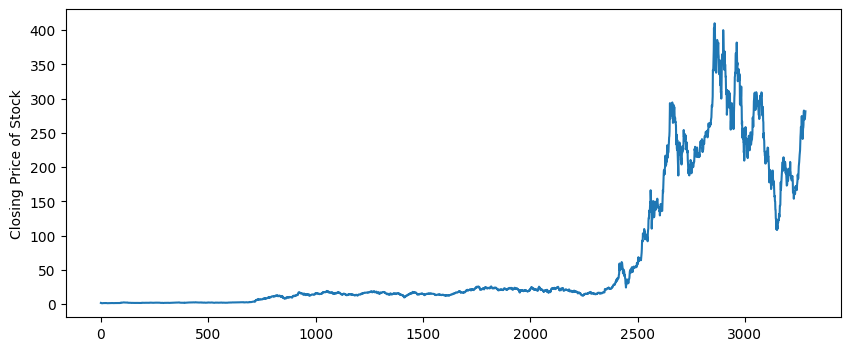

In [15]:
# Plotting trend of the stock's closing price over time
plt.ylabel("Closing Price of Stock")
data['Close'].plot(figsize=(10,4))
plt.show()

# Plot Highlights 

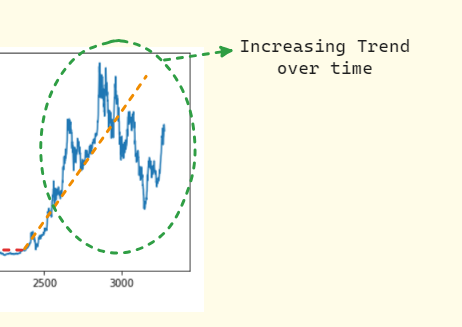


<AxesSubplot: ylabel='Density'>

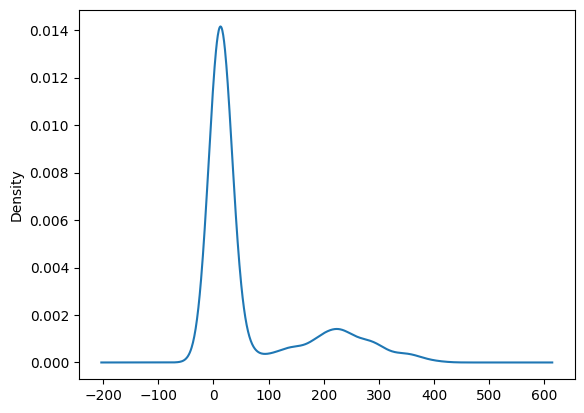

In [16]:
# Create a KDE plot of the closing prices

# The KDE plot shows distribution and concentration of the closing price values.
data['Close'].plot(kind='kde')
# data['Close'].plot(kind='hist', bins=10)

### What is KDE?
`Kernel Density Estimate (KDE):` 
- KDE plot is a smoothed representation of the underlying probability density function (PDF) of a dataset. 
- It provides an estimate of the probability distribution of the data.

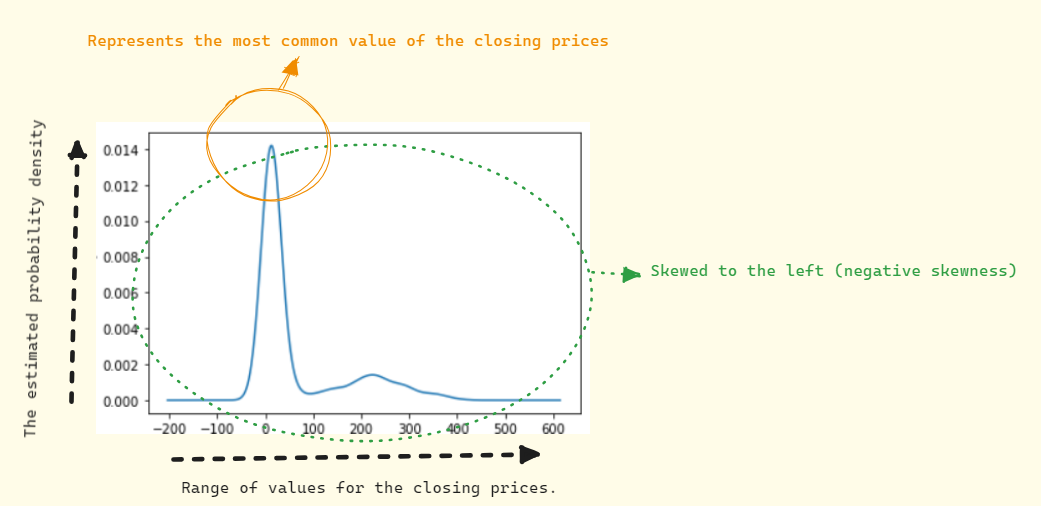

## Calculation and Interpretation of Moving Average and Moving Standard Deviation


`Moving Average Purpose:`
- The moving average is used to smooth out short-term fluctuations in the closing prices and highlight the underlying trend.

-  Moving average is calculated by taking the mean of the closing prices over a window of estimated days.

> POINTS TO REMEMBER FOR MOVING AVG
- A rising moving average indicates an uptrend, while a falling moving average suggests a downtrend.
 
-  Moving averages can act as dynamic support or resistance levels.

`Moving Standard Deviation Purpose:`

- The moving standard deviation measures the dispersion or volatility of the closing prices.

-  moving standard deviation is calculated by taking the standard deviation of the closing prices over a window of estimated days.

> POINTS TO REMEBER FOR MOVING SD

- Higher standard deviation values indicate higher volatility, while lower values suggest lower volatility.

- Standard deviation used to identify periods of high or low volatility.

In [17]:
# Calculating 12 days moving average of the closing prices
data.loc[:, 'Close:12 days rolling'] = data['Close'].rolling(window=10).mean()

# Calculating 12 days moving standard deviation of the closing prices
data.loc[:, 'Close:12 days rolling standard Deviation'] = data['Close'].rolling(window=10).std()


C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_12280\2759150612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Close:12 days rolling'] = data['Close'].rolling(window=10).mean()
C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_12280\2759150612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Close:12 days rolling standard Deviation'] = data['Close'].rolling(window=10).std()


<AxesSubplot: >

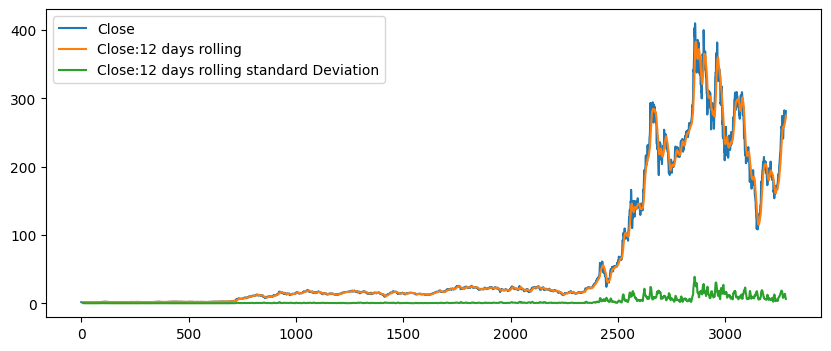

In [18]:
# Multiple lines plot for interpreting the deviation between closing prices, their moving average, and moving standard deviation over time 
data[['Close','Close:12 days rolling','Close:12 days rolling standard Deviation']].plot(figsize=(10,4))

## Plot Interpretation

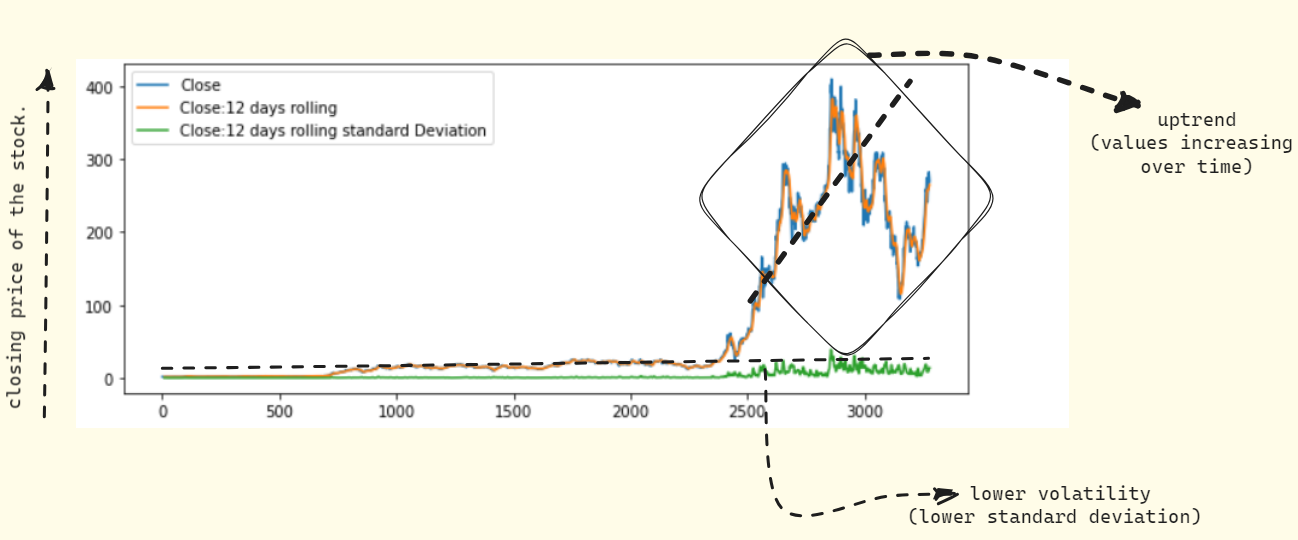

In [19]:
# Calculating 100-days moving average of the closing prices
data.loc[:, 'Close:100 days rolling'] = data['Close'].rolling(window=100).mean().values

# Calculating  100-days of  moving standard deviation of the closing prices
data.loc[:, 'Close:100 days rolling standard Deviation'] = data['Close'].rolling(window=100).std().values


C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_12280\1486300177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Close:100 days rolling'] = data['Close'].rolling(window=100).mean().values
C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_12280\1486300177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Close:100 days rolling standard Deviation'] = data['Close'].rolling(window=100).std().values


In [20]:
# Calculating 200-days moving average of the closing prices
data['Close:200 days rolling']=data['Close'].rolling(window=200).mean()

C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_12280\2080424385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close:200 days rolling']=data['Close'].rolling(window=200).mean()


<AxesSubplot: >

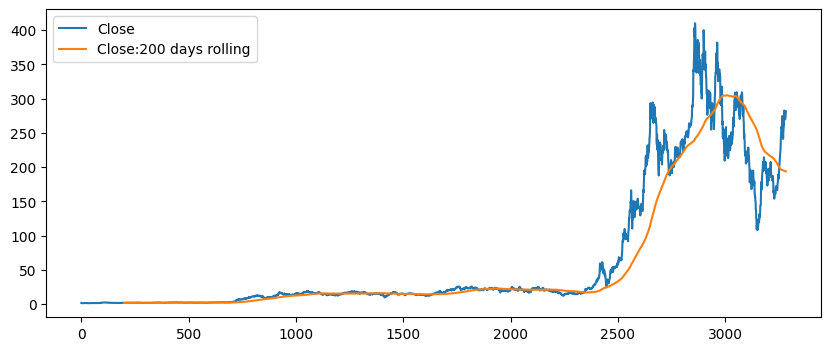

In [21]:
# Plot the closing prices and 200-days moving average
data[['Close','Close:200 days rolling']].plot(figsize=(10,4))

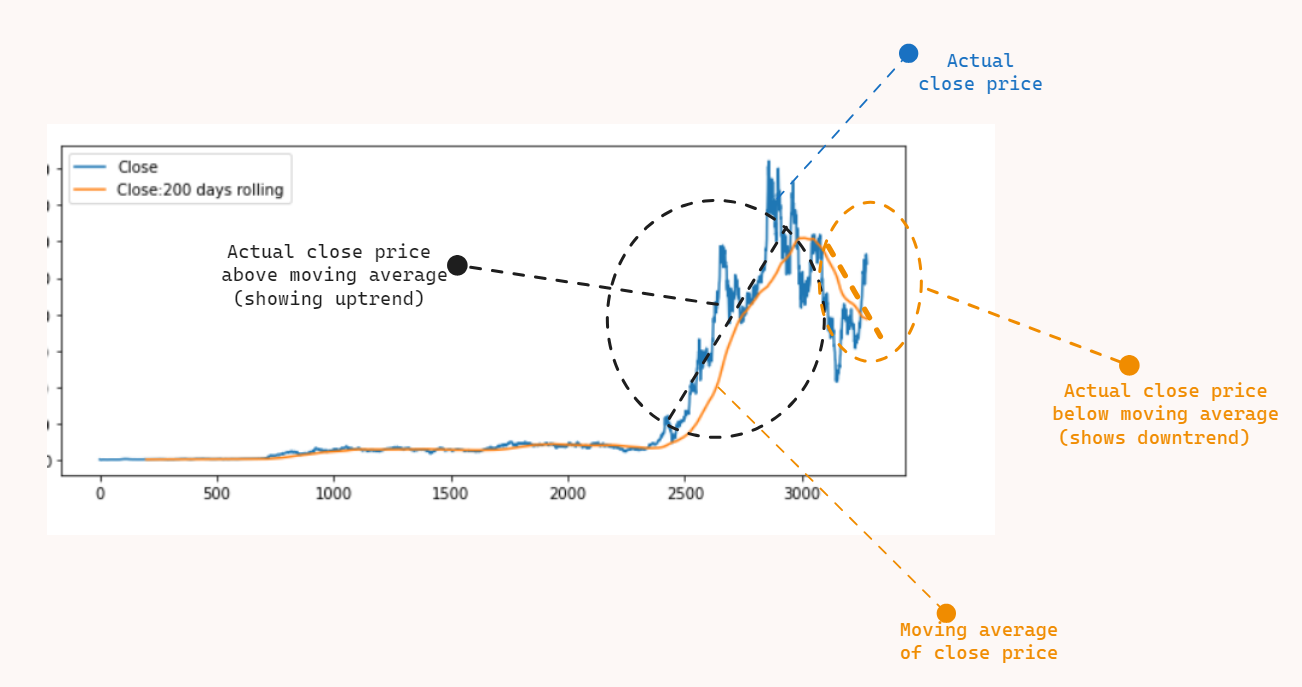

#### How to Interpret??

-  If the closing prices are consistently above the rolling average, it suggests an `UPTREND`. Conversely, if the closing prices are consistently below the rolling average, it suggests a `DOWNTREND`.

- "Large deviations" between close price and moving average may suggest periods of `overvaluation` or `undervaluation`.

- If the closing prices consistently follow the direction of the rolling average, it indicates a relatively stable and well-defined trend over a longer period.

<AxesSubplot: >

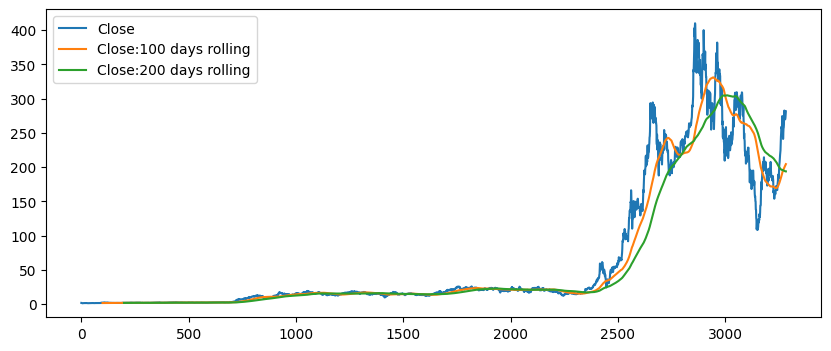

In [22]:
# Line plot showing the closing prices, 100-day moving average, and 200-day moving average of the stock.
data[['Close','Close:100 days rolling','Close:200 days rolling']].plot(figsize=(10,4))

In [23]:
# listing some rows of dataframe
data.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Close:12 days rolling,Close:12 days rolling standard Deviation,Close:100 days rolling,Close:100 days rolling standard Deviation,Close:200 days rolling
2196,2019-03-21,18.173332,18.430000,17.896667,18.268000,18.268000,89206500,18.649000,0.584374,21.441600,1.802402,21.070223
2936,2022-02-25,269.743347,273.166656,260.799988,269.956665,269.956665,76067700,283.703998,17.341922,329.566065,39.647611,277.570933
2803,2021-08-17,224.220001,224.860001,216.279999,221.903336,221.903336,71163900,234.917334,5.682454,219.571934,15.582913,221.727783
2756,2021-06-10,201.293335,205.529999,200.166672,203.373337,203.373337,71758800,202.486668,5.567048,232.989300,29.667066,202.787053
3092,2022-10-10,223.929993,226.990005,218.360001,222.960007,222.960007,67925000,252.102000,23.032427,262.948867,29.935711,288.394167
2416,2020-02-04,58.863998,64.599335,55.591999,59.137333,59.137333,914082000,42.472867,7.417820,24.480487,8.408138,19.826287
2604,2020-10-30,135.633331,135.863327,126.370003,129.346664,129.346664,127533900,139.056000,4.164360,116.139366,28.866882,81.558240
2286,2019-07-30,15.526667,16.224001,15.478667,16.150667,16.150667,121635000,16.548000,0.894902,16.148013,1.936834,18.757847
2093,2018-10-19,17.826000,17.977333,16.900000,17.333332,17.333332,140632500,17.420800,0.535546,20.718647,1.981346,20.809497
509,2012-07-05,2.054000,2.111333,2.053333,2.082000,2.082000,18807000,2.117667,0.069830,2.175233,0.161841,2.057350


<AxesSubplot: >

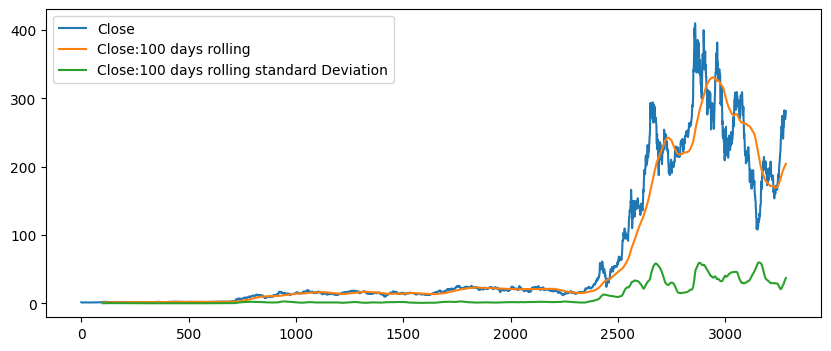

In [24]:
data[['Close','Close:100 days rolling','Close:100 days rolling standard Deviation']].plot(figsize=(10,4))

# STATIONARY OR NOT (USING ADF TEST)

### What is ADF `Augmented Dickey-Fuller` Test

- It is a statistical test used to determine whether a time series data has a unit root or is stationary. Stationarity refers to a time series where the statistical properties, such as the mean, variance, and autocovariance, remain constant over time.

- The ADF test evaluates the null hypothesis that a unit root is present in the data, indicating non-stationarity. The alternative hypothesis suggests that the data is stationary.

`Key Components  of ADF Test :`

- Test Statistic (ADF Statistics):
    - The ADF statistic is the test statistic value obtained from the ADF test to measures the strength of evidence against the null hypothesis.
    - A more negative (large in absolute value) ADF statistic suggests stronger evidence against the presence of a unit root.

- p-value:
    - The p-value is a measure of the strength of evidence against the null hypothesis to represent the probability of observing the ADF statistic or a more extreme value if the null hypothesis is true.
    - A small p-value (typically less than the significance level, e.g., 0.05) indicates strong evidence against the null hypothesis, leading to its rejection.


`Test Interpretation`

- If  p-value is less than the significance level (e.g., 0.05), there is strong evidence against the null hypothesis. We reject the null hypothesis, suggesting that the data is stationary.
- If  p-value is greater than the significance level, we fail to reject the null hypothesis. This implies that we do not have sufficient evidence to conclude that the data is stationary, and it may have a unit root.

In [25]:
# importing libraries for test
from statsmodels.tsa.stattools import adfuller

In [26]:
# Function for adf test
def adf_test(series):
    result=adfuller(series)
    print(type(result))
    print(result)
    print(result[1])
    print('ADF Statistics:{}'.format(result[0]))
    print('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print("Strong Evidence against Null Hypothesis,reject Null Hypothesis(unit root is greater than one) and the Data is Stationary")
    else:
        print("Strong Evidence against alternate Hypothesis,reject alternate Hypothesis(Data has unit root) and the Data is Non Stationary")

In [27]:
# Closign values test for stationary 
adf_test(data['Close'])

<class 'tuple'>
(-0.6250078945968229, 0.8652305570892007, 29, 3253, {'1%': -3.432361825289355, '5%': -2.862428904196608, '10%': -2.567243182757641}, 18908.175085265633)
0.8652305570892007
ADF Statistics:-0.6250078945968229
p-value:0.8652305570892007
Strong Evidence against alternate Hypothesis,reject alternate Hypothesis(Data has unit root) and the Data is Non Stationary


#### Augmented Dickey-Fuller Test (ADF) Result  

- `ADF Statistics : ` -0.7029458256259159
-  `p-value : ` 0.8459850263610833

> There is strong evidence against the alternative hypothesis. Therefore, we reject the alternate hypothesis, which suggests that the data has a unit root. This implies that the data is non-stationary.

<AxesSubplot: >

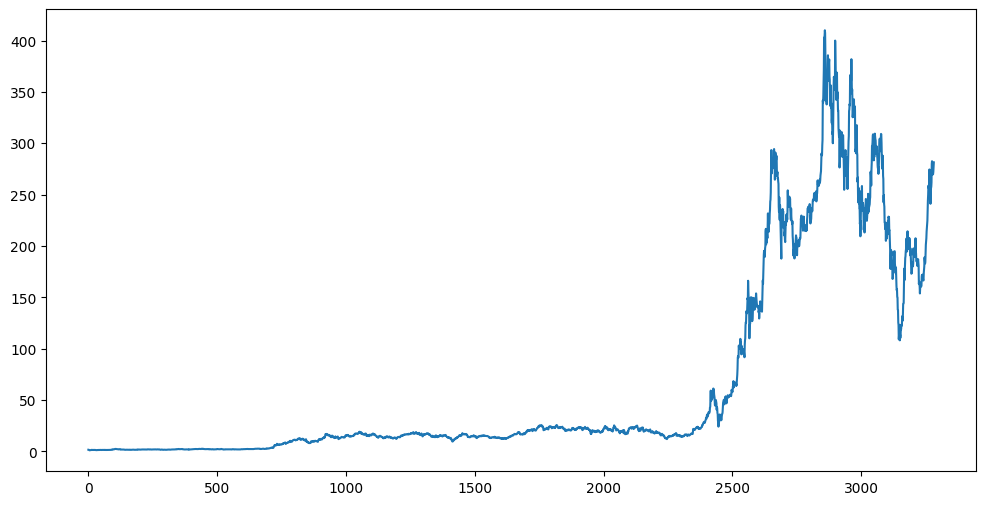

In [28]:
# Non stationary Data Plot
data['Close'].dropna().plot(figsize=(12,6))

### Calculation of First Difference of Closing Prices

- `Purpose `
    - First difference of the closing prices is calculated to transform the time series data into a stationary form. Stationarity is an important assumption for many time series analysis techniques, as it simplifies the modeling process and enables more reliable forecasts.

- `Calculation `
    - First difference is computed by subtracting the previous day's closing price from the current day's closing price. The shift(1) function shifts the closing prices by one day, aligning each value with the previous day's closing price.

- `Interpretation `
    - First difference captures  changes or returns in the closing prices in day to day cycle. It removes the trend or the level component of the series, By taking the difference between consecutive closing prices focusing on the changes or fluctuations over time.

>NOTE

- Interpreting the first difference can help identify the presence of any meaningful patterns or characteristics in the data.

- Positive differences indicate an increase in the closing prices from the previous day, suggesting upward movements or positive returns.

- Negative differences indicate a decrease in the closing prices, indicating downward movements or negative returns.

- Zero differences imply no change in the closing prices between consecutive days.

In [29]:
# Differencing to make close pricing values stationary
data['Close 1 difference']=data['Close']-data['Close'].shift(1)

C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_12280\466542443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close 1 difference']=data['Close']-data['Close'].shift(1)


In [30]:
# Now Data is stationary
adf_test(data['Close 1 difference'].dropna())

<class 'tuple'>
(-10.56792723215458, 7.433318250610958e-19, 28, 3253, {'1%': -3.432361825289355, '5%': -2.862428904196608, '10%': -2.567243182757641}, 18901.7738481344)
7.433318250610958e-19
ADF Statistics:-10.56792723215458
p-value:7.433318250610958e-19
Strong Evidence against Null Hypothesis,reject Null Hypothesis(unit root is greater than one) and the Data is Stationary


<AxesSubplot: >

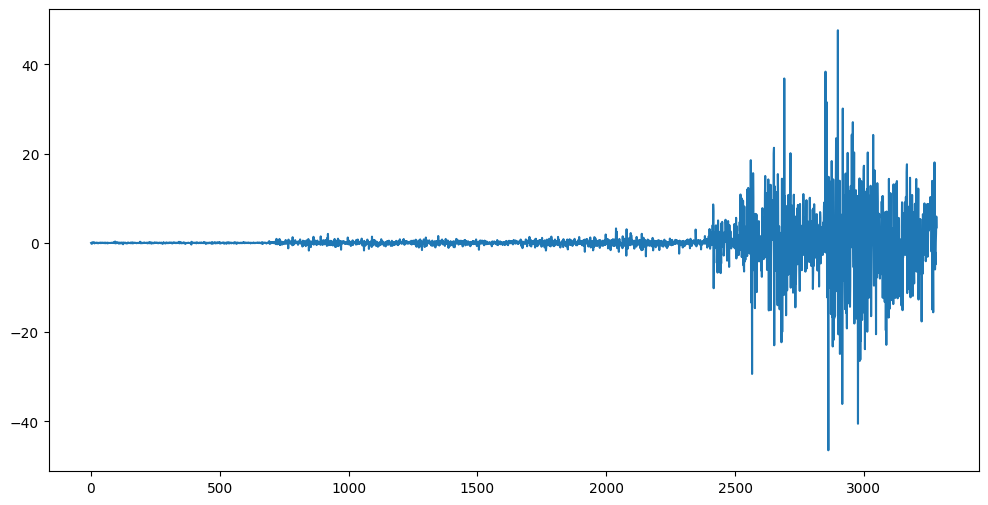

In [31]:
# plotting stationary values
data['Close 1 difference'].dropna().plot(figsize=(12,6))

## Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

`Introduction:` -> The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are commonly used statistical tools to provide insights into the correlation and relationship between observations within a time series and help identify patterns, trends.

### `Autocorrelation Function (ACF):`

- `Purpose :`
    - It is used to  measures the correlation between an observation and lagged versions of itself at different time lags. It helps identify the presence of autocorrelation, which is the correlation between a variable and its past values.

- `Calculation:`
    - The ACF is computed by taking the correlation coefficient between the original time series and its lagged versions. Each lag represents a specific time distance between observations.

- `Interpretation:`
    - Positive ACF values indicate a positive correlation between the current observation and the past observations at that lag. It suggests that an increase or decrease in the current value is associated with similar changes in the past values at that lag.
    
    - Negative ACF values indicate a negative correlation between the current observation and the past observations at that lag. It suggests that an increase in the current value is associated with a decrease in the past values at that lag, or vice versa.
    
    - ACF values near zero suggest no significant correlation between the current observation and the past observations at that lag.

> The ACF plot helps identify the presence of seasonality or cyclical patterns in the time series. Peaks or significant values at specific lags may indicate the presence of repeating patterns between observations.

### `Partial Autocorrelation Function (PACF):`

- `Purpose:`
    - The PACF measures the correlation between an observation and its specific lagged values while controlling for the effects of shorter lags. It helps identify the direct relationship between observations, independent of intermediate lags.

- `Calculation:`
    - The PACF is computed using recursive regression methods. It measures the correlation between the current observation and its specific lagged values after removing the effects of shorter lags.

- `Interpretation:`
    - Positive PACF values at a specific lag indicate a direct relationship between the current observation and the lagged value, controlling for shorter lags.
    
    - Negative PACF values at a specific lag indicate an inverse relationship between the current observation and the lagged value, controlling for shorter lags.

    - PACF values near zero suggest no significant correlation between the current observation and the lagged values at that specific lag, after accounting for intermediate lags.

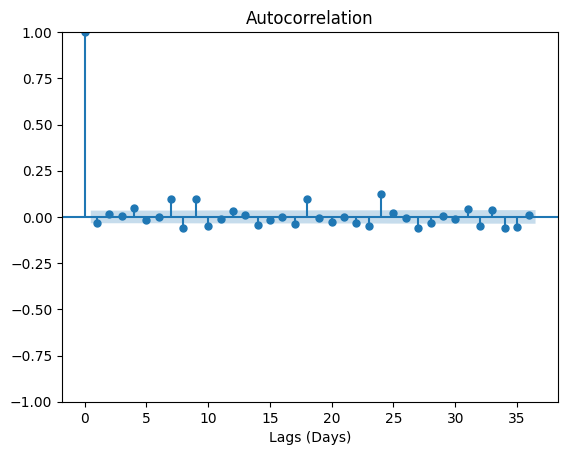

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
ACF=plot_acf(data['Close 1 difference'].dropna())
plt.xlabel('Lags (Days)')
plt.show()

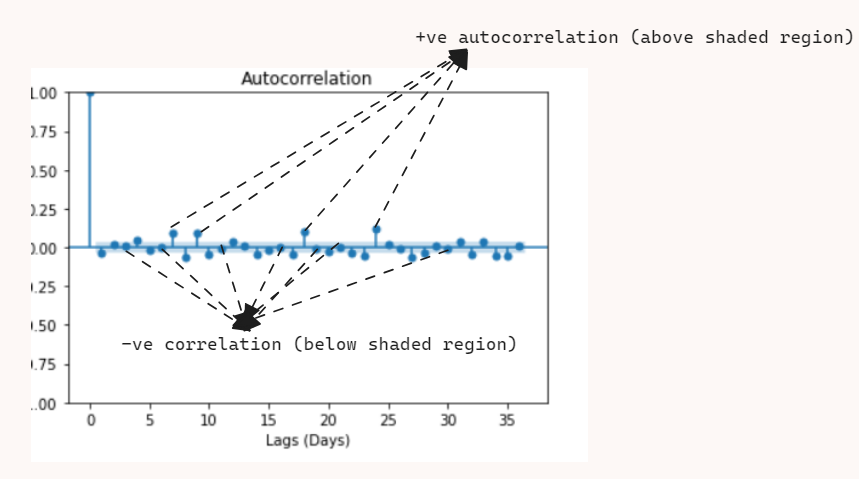

C:\Users\Manoj Kuliyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


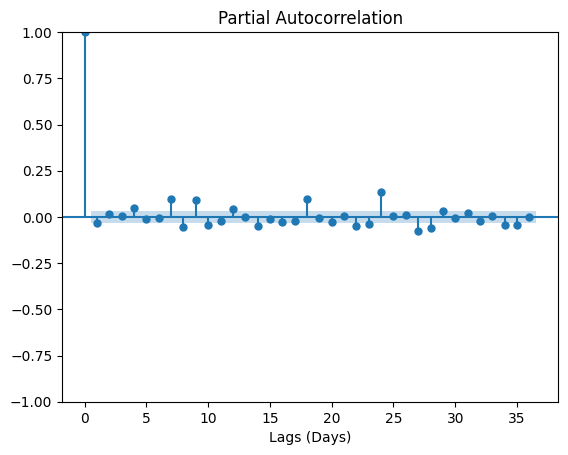

In [33]:
PACF=plot_pacf(data['Close 1 difference'].dropna())
plt.xlabel('Lags (Days)')
plt.show()

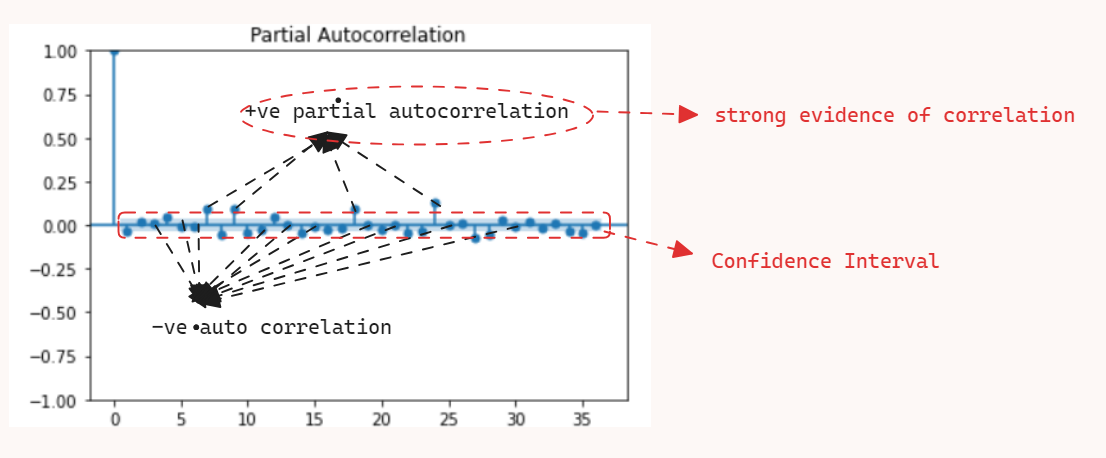

# TRAIN-TEST SPLIT

In [34]:
train_data=pd.DataFrame(data[['Close']][0:int(len(data)*(90/100))])
test_data=pd.DataFrame(data[['Close']][int (len(data)*(90/100)):int(len(data))])

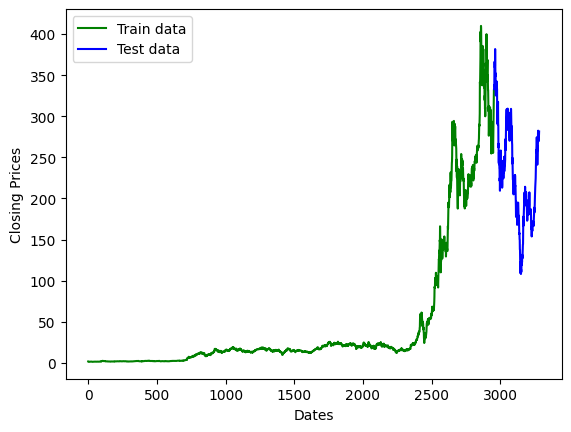

In [35]:
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data,'green',label='Train data')
plt.plot(test_data,'blue',label='Test data')
plt.legend()

In [36]:
train_data

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000
...,...
2949,280.076660
2950,290.533325
2951,301.796661
2952,307.053345


In [37]:
test_data

,Close
2954,333.036682
2955,337.973328
2956,336.880005
2957,363.946655
2958,366.523346
...,...
3278,269.609985
3279,269.790009
3280,271.989990
3281,277.899994


In [38]:
train_data

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000
...,...
2949,280.076660
2950,290.533325
2951,301.796661
2952,307.053345


In [39]:
test_data

,Close
2954,333.036682
2955,337.973328
2956,336.880005
2957,363.946655
2958,366.523346
...,...
3278,269.609985
3279,269.790009
3280,271.989990
3281,277.899994


In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
from pmdarima.arima import auto_arima

In [42]:
model_autoARIMA = auto_arima(train_data,
                      test='adf',       
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16155.975, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16157.581, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16157.564, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16156.622, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16159.256, Time=0.97 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 5.148 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2954
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8075.987
Date:                Sun, 16 Jul 2023   AIC                          16155.975
Time:                        08:34:13   BIC                          16167.956
Sample:                             0   HQIC                         16160.288
          

##  SARIMAX Model Result
`Model Information:`
    - Model: ARIMA(0,1,0)(0,0,0)[0] with intercept
    
    - Dependent Variable: y (closing prices of the stock)

`Log Likelihood and Information Criteria:`
    
    - Log Likelihood: -8036.781
    
    - Akaike Information Criterion (AIC): 16083.561
    
    - Bayesian Information Criterion (BIC): 16113.509
    
    - Hannan-Quinn Information Criterion (HQIC): 16094.342

`Interpretation of Model Results:`
    -Coefficients: The model includes coefficients for the autoregressive (AR), differencing (I), and moving average (MA) terms. In this case, the model has an ARIMA(1,1,2) structure, indicating a first-order differencing, one autoregressive term, and two moving average terms.

`Model Evaluation:`
    - Log Likelihood: The log likelihood measures the goodness of fit of the model. In this case, the log likelihood is -8036.781, and a higher log likelihood value suggests a better fit.
    
    - Information Criteria: The AIC, BIC, and HQIC are information criteria used for model selection. Lower values of these criteria indicate a better model fit.

> We Found that value of log is negative which means the model is not a fit for data but still we try to interpret result and lets see what it reults 

## FITTING MODEL ON GIVEN TRIPLET(0,1,0)

In [43]:
model_arima = ARIMA(train_data, order=(0,1,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2954
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -8077.311
Date:                Sun, 16 Jul 2023   AIC                          16156.622
Time:                        08:34:13   BIC                          16162.613
Sample:                             0   HQIC                         16158.779
                               - 2954                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        13.9117      0.079    176.511      0.000      13.757      14.066
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):            199129.21
Prob(Q):                              0.53   Pr

# EVALUATION

> ar.L1: -0.8162
    
    - The autoregressive (AR) coefficient for lag 1 is -0.8162. It indicates a negative correlation between the current observation and the previous observation at lag 1.

> ma.L1: 0.7999

    - The moving average (MA) coefficient for lag 1 is 0.7999. It indicates a positive correlation between the current observation and the lagged moving average value at lag 1.

> ma.L2: -0.0483

    - The moving average (MA) coefficient for lag 2 is -0.0483. It indicates a negative correlation between the current observation and the lagged moving average value at lag 2.

> sigma2: 13.6199

    - The estimated variance of the error term (residuals) is 13.6199. It represents the level of variability in the model that is not explained by the ARIMA terms.

# Model Evaluation:

*Log Likelihood: -8037.894*
    
    - The log likelihood measures the goodness of fit of the model. In this case, a higher log likelihood value indicates a better fit.

*Akaike Information Criterion (AIC): 16083.789*
    
    - The AIC is an information criterion used for model selection. A lower AIC value indicates a better trade-off between model fit and complexity.

*Bayesian Information Criterion (BIC): 16107.747*
    
    - The BIC is another information criterion that penalizes model complexity. A lower BIC value suggests a better model fit.

*Ljung-Box (L1) (Q): 0.00*

    - The Ljung-Box statistic measures the autocorrelation of the residuals. A significant value indicates the presence of autocorrelation. In this case, a value of 0.00 suggests no significant autocorrelation at lag 1.

*Jarque-Bera (JB): 206082.00*
    
    - The Jarque-Bera statistic tests the normality assumption of the residuals. A significant value indicates a departure from normality. In this case, the JB value of 206082.00 suggests a significant deviation from normality.


In [44]:
test_data.head(100)

,Close
2954,333.036682
2955,337.973328
2956,336.880005
2957,363.946655
2958,366.523346
...,...
3049,283.333344
3050,294.356659
3051,286.630005
3052,300.029999


In [45]:
forecast_values=model_arima_fit.forecast(len(test_data),alpha=0.05)
forecast_values

2954    331.32666
2955    331.32666
2956    331.32666
2957    331.32666
2958    331.32666
          ...    
3278    331.32666
3279    331.32666
3280    331.32666
3281    331.32666
3282    331.32666
Name: predicted_mean, Length: 329, dtype: float64

In [46]:
test_data['Predicted']=forecast_values

In [47]:
test_data

,Close,Predicted
2954,333.036682,331.32666
2955,337.973328,331.32666
2956,336.880005,331.32666
2957,363.946655,331.32666
2958,366.523346,331.32666
...,...,...
3278,269.609985,331.32666
3279,269.790009,331.32666
3280,271.989990,331.32666
3281,277.899994,331.32666


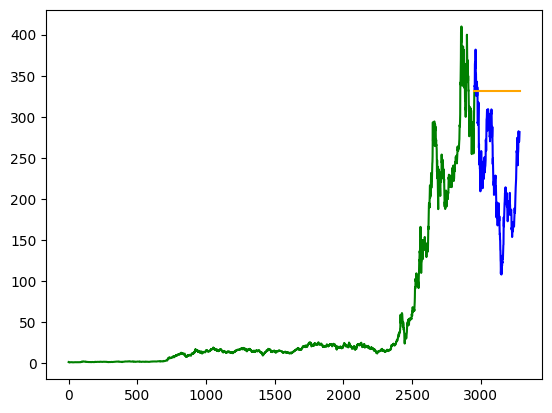

In [48]:
plt.plot(train_data,color='green',label='Training Data')
plt.plot(test_data['Close'],color='blue',label='Actual Price stock')
plt.plot(test_data['Predicted'],color='Orange',label='Prediction')

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(test_data['Close'], test_data['Predicted'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], test_data['Predicted'])
print('MAE: '+str(mae))

rmse = math.sqrt(mean_squared_error(test_data['Close'], test_data['Predicted']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_data['Predicted'] - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 14214.127776485084
MAE: 105.77495883373504
RMSE: 119.22301697442941
MAPE: 0.5694076789102236


# Conclusion of ARIMA

- It is not good at real playground prediction.
- It needs a lot of upgradation for better performance.
- It provides constant(straight line) at the best parameters.

#### Arima is just for learning and have lower rate of success in real forecast playground

# Applying Deep Learning `LSTM (LONG SHORT TERM MEMORY)` 

- (LSTM) is a model that increases the memory of recurrent neural networks.

- An LSTM recurrent unit tries to “remember” all the past knowledge that the network is seen so far and to “forget” irrelevant data by different activation function layers called “gates” for different purposes. 

### LSTM WORKING !!!

- At a basic level, the output of an LSTM at a particular point in time is dependant on three things:
    
    ▹ The current long-term memory of the network — known as the cell state
    
    ▹ The output at the previous point in time — known as the previous hidden state
    
    ▹ The input data at the current time step

- `LSTMs use a series of ‘gates’ which control how the information in a sequence of data comes into, is stored in and leaves the network. There are three gates in a typical LSTM; forget gate, input gate and output gate. These gates can be thought of as filters and are each their own neural network.`

## Step 1

    - The previous hidden state and new input data are fed into a neural network.
    - The network generates a vector with values between 0 and 1 using the sigmoid activation function.
    - Each element of the vector represents a filter or sieve, determining the relevance of the corresponding input component.
    - The vector is multiplied element-wise with the previous cell state.
    - Components with values close to 0 are considered irrelevant and have reduced influence on subsequent steps.
    - The forget gate selectively updates the long-term memory by retaining important information and discarding irrelevant information.


## Step 2
    - The new memory network combines the previous hidden state and new input data to generate a "new memory update vector" using a tanh activation function.
    - The input gate, a sigmoid-activated network, acts as a filter to determine which components of the new memory vector are worth retaining.
    - The output of the new memory network and the input gate are pointwise multiplied.
    - The resulting vector regulates the magnitude of new information and sets it to 0 if necessary.
    - The combined vector is added to the cell state, updating the long-term memory of the network.

## Step 3

    - Apply the tanh function to the current cell state pointwise, resulting in the squished cell state within the range [-1, 1].
    - Use a sigmoid-activated neural network to process the previous hidden state and current input data and obtain the filter vector.
    - Apply the filter vector to the squished cell state through pointwise multiplication.
    - Output the new hidden state.

## REMEMBER
    
- `Repetition of steps :` The steps described in the LSTM cell, including forget gate, new memory network, input gate, and output gate, are repeated multiple times. In the case of predicting the next day's stock price based on the previous 30 days of pricing data, these steps would be repeated 30 times, resulting in 30 hidden states.

- `Conversion to output :` While the hidden states contain valuable information, they are not directly usable for generating predictions. To convert the hidden state into the desired output, such as tomorrow's stock price, an additional step is required. This step involves applying a linear layer at the end of the LSTM process. This linear layer transformation is performed only once and is responsible for converting the hidden state into the final output.

###  DATA GATHERING

In [50]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Close:12 days rolling', 'Close:12 days rolling standard Deviation',
       'Close:100 days rolling', 'Close:100 days rolling standard Deviation',
       'Close:200 days rolling', 'Close 1 difference'],
      dtype='object')

In [51]:
#Splitting data into training and testing
train_data=pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
test_data=pd.DataFrame(data['Close'][int(len(data)*0.70):len(data)])

In [52]:
print(train_data.shape)
print(test_data.shape)

(2298, 1)
(985, 1)


### DATA PREPROCESSING

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data_transform=scaler.fit_transform(train_data)
train_data_transform

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.57749184],
       [0.59371613],
       [0.55205845]])

### Preparing Training Data

In [54]:
x_train=[]
y_train=[]
for i in range(100,train_data_transform.shape[0]):
    x_train.append(train_data_transform[i-100:i])
    y_train.append(train_data_transform[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [55]:
print(x_train.shape)
print(y_train.shape)

(2198, 100, 1)
(2198,)


### MODEL CREATION

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout

In [57]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [59]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
35/35 [==============================] - 29s 581ms/step - loss: 0.0858
Epoch 2/50
35/35 [==============================] - 35s 1s/step - loss: 0.0174
Epoch 3/50
35/35 [==============================] - 39s 1s/step - loss: 0.0119
Epoch 4/50
35/35 [==============================] - 44s 1s/step - loss: 0.0112
Epoch 5/50
35/35 [==============================] - 35s 996ms/step - loss: 0.0096
Epoch 6/50
35/35 [==============================] - 37s 1s/step - loss: 0.0094
Epoch 7/50
35/35 [==============================] - 34s 953ms/step - loss: 0.0095
Epoch 8/50
35/35 [==============================] - 266s 8s/step - loss: 0.0089
Epoch 9/50
35/35 [==============================] - 36s 1s/step - loss: 0.0083
Epoch 10/50
35/35 [==============================] - 37s 1s/step - loss: 0.0081
Epoch 11/50
35/35 [==============================] - 36s 1s/step - loss: 0.0101
Epoch 12/50
35/35 [==============================] - 36s 1s/step - loss: 0.0082
Epoch 13/50
35/35 [====================

In [61]:
import tensorflow as tf

In [62]:
test_data

,Close
2298,14.376000
2299,14.662667
2300,15.122000
2301,15.057333
2302,14.722000
...,...
3278,269.609985
3279,269.790009
3280,271.989990
3281,277.899994


## Preparing Test Data 

In [63]:
prev_100_days=train_data.tail(100)

In [64]:
final_df=prev_100_days.append(test_data,ignore_index=True)
final_df

C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_12280\758370482.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=prev_100_days.append(test_data,ignore_index=True)


,Close
0,17.361334
1,17.851334
2,18.322001
3,18.574667
4,18.657333
...,...
1080,269.609985
1081,269.790009
1082,271.989990
1083,277.899994


In [65]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(1085, 1)

In [66]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(985, 100, 1)
(985,)


In [67]:
##Prediction
y_pred=model.predict(x_test)

31/31 [==============================] - 4s 91ms/step


In [68]:
scaler.scale_

array([0.00251232])

In [69]:
scale_factor=1/0.00251232
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

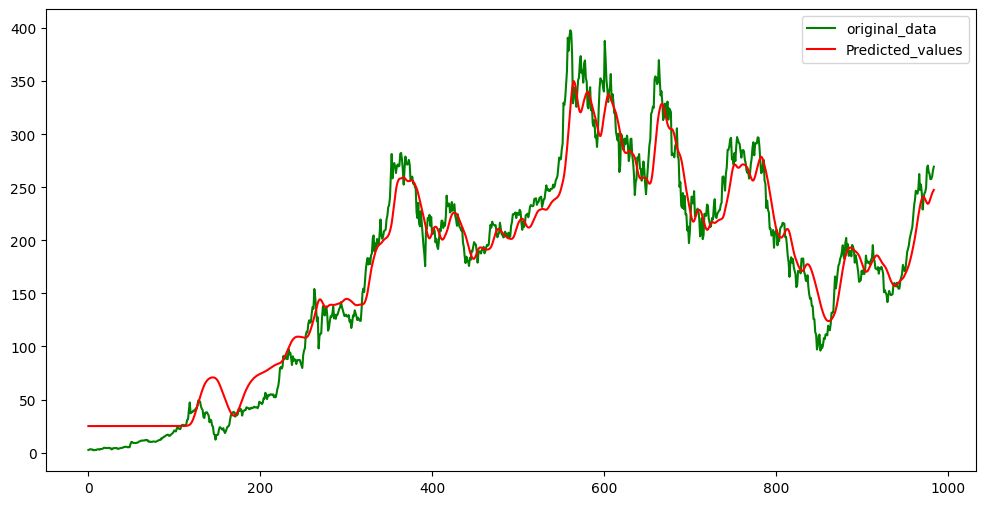

In [70]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'g',label='original_data')
plt.plot(y_pred,'r',label='Predicted_values')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(y_test,y_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+str(mae))

rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: '+str(mape))

MSE: 459.28192507416196
MAE: 16.774389197530738
RMSE: 21.430863843395628
MAPE: 4.016343777348667


# Final Results 

- As Far from all my findings, all my conclusions collected are shown here :
    - Applying Base models on datset may not be capable of ignoring redundencies ( odd fluctucations), which are further handled by lstm .
    
    - Base models like Sarima or Sarimax are work on regressive manner which can easily affected through outliers (high fluctuations).
    
    - One thing that i had noticed is it creating a DL model will need consitent maintainane and it diificult to interpret on which features it will  pridicting these best results.